# NetworkX
This Notebook contains a series of steps to check what functionallities are available to analyse social networks using the librarie NetworkX.

## Setup Libraries

**Install necessary libraries**: If you haven't already installed `pandas`, `matplotlib`, `scipy` and `networkx` - as well as `Jupyter` if not already installed -, you can do so using pip or conda. For example, to install them via pip, you would run the following commands in your terminal or command prompt.

```sh
pip install -r requirements.txt
```

Once done, you are good to start coding

## Start Coding
### Step 1: Import CSV File
First we are going to import the data from a csv file using pandas.

In [1]:
import pandas as pd
df = pd.read_csv('sna_dataset.csv')


### Step 2: Setup the Plotter
Second, setup the default parameters for the plotter

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (8, 4),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

### Step 3: Create a network from the data
Assuming your CSV has at least two columns representing nodes or edges.

In [3]:
import networkx as nx
Graphtype=nx.Graph() 
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Link', create_using=Graphtype)
print(G)

Graph with 532 nodes and 552 edges


### Step 4: Plot the Network using Matplotlib
Using matplotlib librarie the network graph you created in step 2. You can use different layouts to visualize your network. Here are some examples of layouts that you might want to try:
- spring_layout: This is a default layout that positions nodes using springs that pull them towards their neighbors and repel them from each other.
- spectral_layout: This layout uses the graph's adjacency matrix eigenvalues for positioning the nodes.
- circular_layout: This layout places nodes in a circle around a central node.
- random_layout: This layout randomly positions the nodes on the canvas.


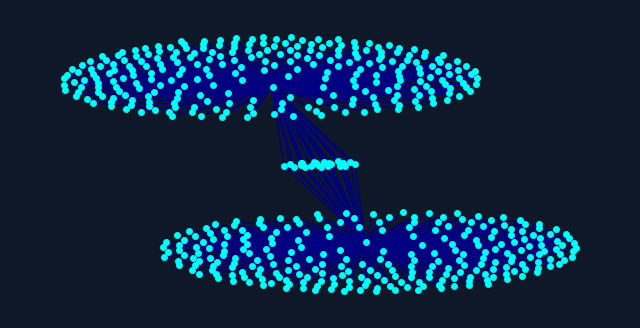

In [4]:
# 1. Initialize plotter
fig, ax = plt.subplots(figsize=(8, 4), facecolor='#0F1829')

# 2. Draw graph using NetworkX
nx.draw(G,ax=ax, with_labels=False, node_size=20, edge_color='navy', node_color='cyan', arrows=True)
#nx.draw(G, with_labels=False,arrows=True, edge_color='#46000E', node_color='#FF3E4D', node_size=node_sizes, font_size=1, font_weight='light')

# 3. Configure plotter 
ax.axis('off')
fig.patch.set_facecolor('#0F1829')
ax.set_facecolor('#0F1829')


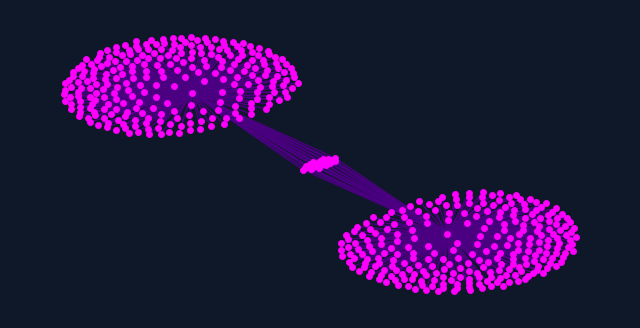

In [5]:
# 1. Initialize the plotter
fig2, ax2 = plt.subplots(figsize=(8, 4), facecolor='#0F1829')

# Organize layout and draw
pos = nx.spring_layout(G)  # You can try 'shell_layout' or 'spectral_layout' for large graphs
nx.draw(G, pos, ax=ax2, with_labels=False, node_size=20, edge_color='indigo', node_color='magenta', arrows=True)

# 3. Configure plotter 
#plt.title('Graph Representation of the Social Network', color='cyan')
ax2.axis('off')
fig2.patch.set_facecolor('#0F1829')
ax2.set_facecolor('#0F1829')

### Step 5: Detect Degree Centrality
One way to mesure the importance of a node is by knowing how many direct connections the node has. The degree centrality of a node gives an importance score based on this number of direct connections.

To calculate closeness centrality for each node in our graph using NetworkX, we use the `degree_centrality` function from the NetworkX library.

##### Calculate the degree centrality values

In [6]:
degree_centrality = nx.degree_centrality(G)
for node, degree in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {degree}")

Node https://www.youtube.com/user/TheYoungTurks/videos: Degree Centrality = 0.5235404896421846
Node https://www.youtube.com/watch?v=cdzaxoGrd0k: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=Py_SZt9el_E: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=pMiqlgdcpb0: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=3k8LK0wpHzs: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=xjQ9D9uCPjw: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=vFCAFZGsGYs: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=f8enlSLorhM: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=Gr0KVzcIqVM: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=0x76GbrZGjg: Degree Centrality = 0.0018832391713747645
Node https://www.youtube.com/watch?v=0m6Xz6s0EdI: Degree Centrality = 0.00188

##### Display the calculated degree centrality values

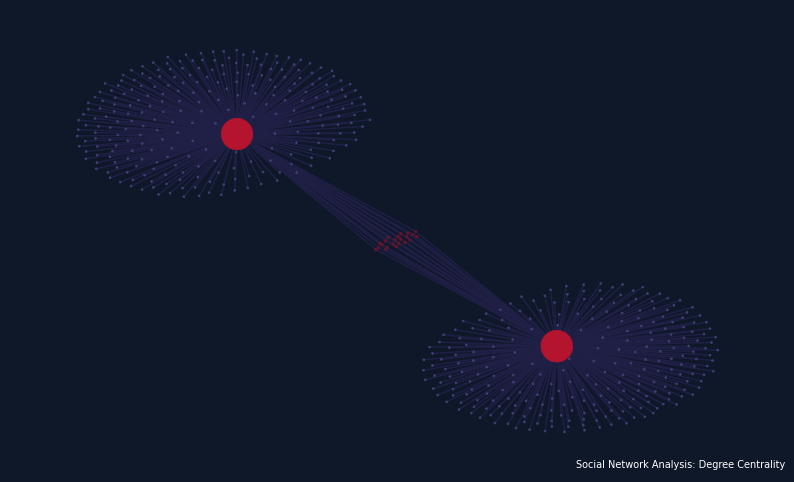

In [7]:
# 1. Initialize the plotter
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')

node_sizes = [
    degree_centrality[n] * 1000  if (degree_centrality[n] * 500 > 20) 
    else degree_centrality[n] * 500 + 10 if degree_centrality[n] * 1000 > 11 
    else (degree_centrality[n] * 1000) for n in G.nodes()]

node_colors = ['#B4142d' if n > 200 else '#64142d' if n > 3 else '#404076' for n in node_sizes]
nx.draw(G, pos, 
        with_labels=False,
        arrows=True, 
        edge_color='#202046', 
        node_color=node_colors, 
        node_size=node_sizes)

# 3. Configure plotter 
ax.set_title("Social Network Analysis: Degree Centrality", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#0F1829')
ax.set_facecolor('#0F1829')


### Step 6: Closeness Centrality
Another meassurement in SNA is closeness centrality, which measures how close a node is to all the other nodes in the network. 
Basically it calculates the shortest path between two given nodes, and then ises this distance to calculate the centrality score for that node.

To calculate closeness centrality for each node in our graph using NetworkX, we use the `closeness_centrality` function from the NetworkX library.



##### Calculate Closeness Centrality

In [8]:
closeness_centrarlity = nx.closeness_centrality(G)
for node, centrality in closeness_centrarlity.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

Node https://www.youtube.com/user/TheYoungTurks/videos: Closeness Centrality = 0.5125482625482626
Node https://www.youtube.com/watch?v=cdzaxoGrd0k: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=Py_SZt9el_E: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=pMiqlgdcpb0: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=3k8LK0wpHzs: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=xjQ9D9uCPjw: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=vFCAFZGsGYs: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=f8enlSLorhM: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=Gr0KVzcIqVM: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=0x76GbrZGjg: Closeness Centrality = 0.3390804597701149
Node https://www.youtube.com/watch?v=0m6Xz6s0EdI: Closeness Centrality = 0

##### Draw Closeness Centrality

In [9]:
node_sizes = [closeness_centrarlity[n] * 100  for n in G.nodes()]

node_colors = [closeness_centrarlity[n]  for n in G.nodes()]

for n in node_sizes:
    print(n)

51.254826254826256
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
50.09433962264151
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
33.90804597701149
50.09433962264151
33.90804597701149
33.90804597701149
50.09433962264151
33.90804597701149
50.09433962264151
50.09433962264151
50.09433962264151
33.908045

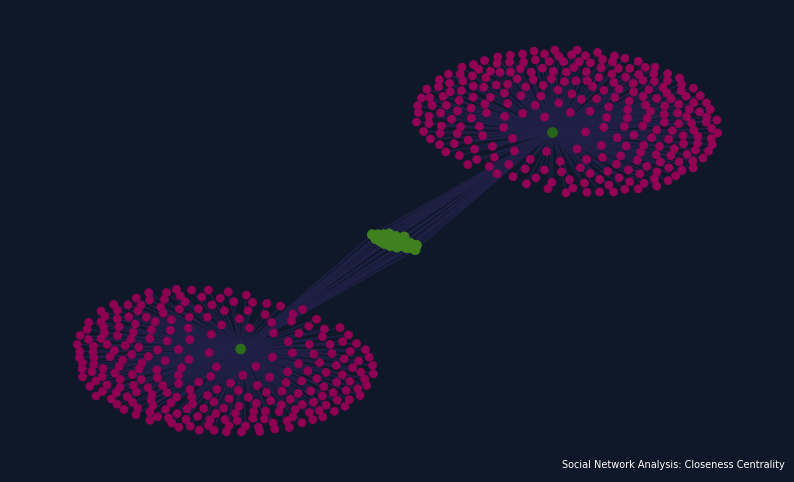

In [10]:
# 1. Initialize the plotter
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')

# 2. Draw the graph
nx.draw(G, 
        with_labels=False, 
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.PiYG,    
        edge_color='#202046')

# 3. Configure plotter 
ax.set_title("Social Network Analysis: Closeness Centrality", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#0F1829')
ax.set_facecolor('#0F1829')

### Step 7: Betweenness centrality

Betweenness centrality is a measure of the centrality of a vertex within a graph, calculated as the fraction of shortest paths that pass through the given vertex. 
It was introduced by Linton Freeman and measures how important a node is based on how many times the nodes actas as a bridge between other nodes in the network.

To calculate betweenness centrality for each node in our graph using NetworkX, we use the `betweenness_centrality` function from the NetworkX library.


##### Calculate Betweenness Centrality

In [11]:
betweenness_centrality = nx.betweenness_centrality(G)

for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

Node https://www.youtube.com/user/TheYoungTurks/videos: Closeness Centrality = 0.7330810503499983
Node https://www.youtube.com/watch?v=cdzaxoGrd0k: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=Py_SZt9el_E: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=pMiqlgdcpb0: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=3k8LK0wpHzs: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=xjQ9D9uCPjw: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=vFCAFZGsGYs: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=f8enlSLorhM: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=Gr0KVzcIqVM: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=0x76GbrZGjg: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=0m6Xz6s0EdI: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=AQZFB0mD6OA: Closeness Centrality = 0.0
Node https://www.youtube.com/watch?v=LQI2YInFMAk: Close

/home/usernormal/projects/tfm/sna_python/.venv/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


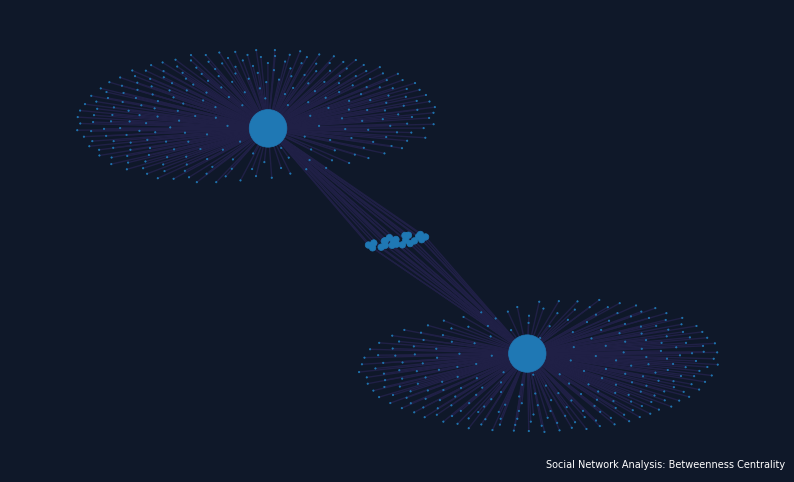

In [12]:
# 1. Initialize the plotter
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')

node_sizes = [betweenness_centrality[n] * 1000 + 1  for n in G.nodes()]
node_colors = [betweenness_centrality[n] * 1000  for n in G.nodes()]

# 2. Draw the graph
nx.draw(G, 
        with_labels=False, 
        node_size=node_sizes,
        cmap=plt.cm.Reds,    
        edge_color='#202046')

# 3. Configure plotter 
ax.set_title("Social Network Analysis: Betweenness Centrality", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#0F1829')
ax.set_facecolor('#0F1829')

### Step 8: EigenCentrality

Eigencentrality is a measure similar to degree centrality, where it has into account the number of 
connections that nodes have but also takes into account the "importance" or "strength" of those connections, how many conections those nodes have -.
It's based on the idea that connections with high weights are more important than those with low weights.

We can calculate eigencentrality using `networkx` by simply calling the `eigenvector_centrality()` function.


In [13]:
eigenvector_centrality = nx.eigenvector_centrality(G)

for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

Node https://www.youtube.com/user/TheYoungTurks/videos: Closeness Centrality = 0.5221361796002074
Node https://www.youtube.com/watch?v=cdzaxoGrd0k: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=Py_SZt9el_E: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=pMiqlgdcpb0: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=3k8LK0wpHzs: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=xjQ9D9uCPjw: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=vFCAFZGsGYs: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=f8enlSLorhM: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=Gr0KVzcIqVM: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=0x76GbrZGjg: Closeness Centrality = 0.030240985080525407
Node https://www.youtube.com/watch?v=0m6Xz6s0EdI: Closen

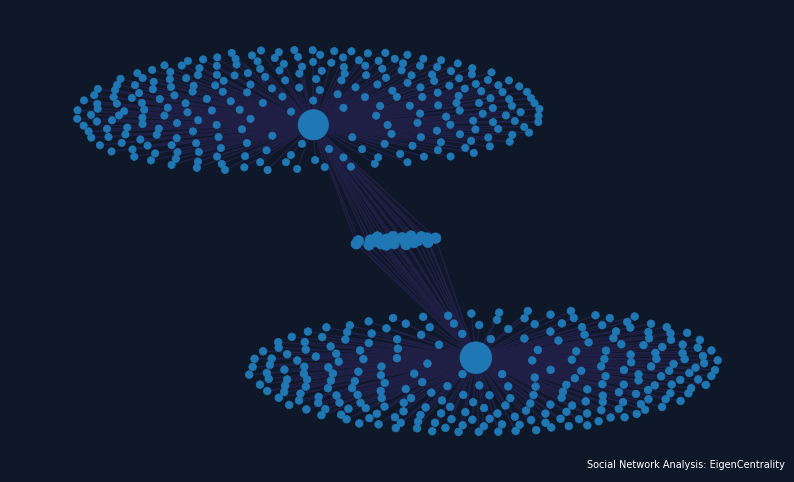

In [14]:
# 1. Initialize the plotter
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')

node_sizes = [eigenvector_centrality[n] * 1000  for n in G.nodes()]
node_colors = [eigenvector_centrality[n] * 1000  for n in G.nodes()]

# 2. Draw the graph
nx.draw(G, 
        with_labels=False, 
        node_size=node_sizes,
        cmap=plt.cm.Reds,    
        edge_color='#202046')

# 3. Configure plotter 
ax.set_title("Social Network Analysis: EigenCentrality", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#0F1829')
ax.set_facecolor('#0F1829')

### Setp 9: PageRank
It is very similar to EigenCentrality, where it measures the importance of a node base on its connections, the diference is that it has into account the direction of the links.
Each node has an score base on the number of incoming links and how important the nodes connected are.

A node with litlle connections but with important incoming connections will be considered important. For example, 
if a webpage has few outgoing links but many inbound links from other important pages, it would have a high PageRank value.

We can calculate eigencentrality using `networkx` by simply calling `pagerank()`.


In [15]:
pagerank = nx.pagerank(G)

for node, centrality in pagerank.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

Node https://www.youtube.com/user/TheYoungTurks/videos: Closeness Centrality = 0.2316566003775768
Node https://www.youtube.com/watch?v=cdzaxoGrd0k: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=Py_SZt9el_E: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=pMiqlgdcpb0: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=3k8LK0wpHzs: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=xjQ9D9uCPjw: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=vFCAFZGsGYs: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=f8enlSLorhM: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=Gr0KVzcIqVM: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=0x76GbrZGjg: Closeness Centrality = 0.000989873217745374
Node https://www.youtube.com/watch?v=0m6Xz6s0EdI: Closen

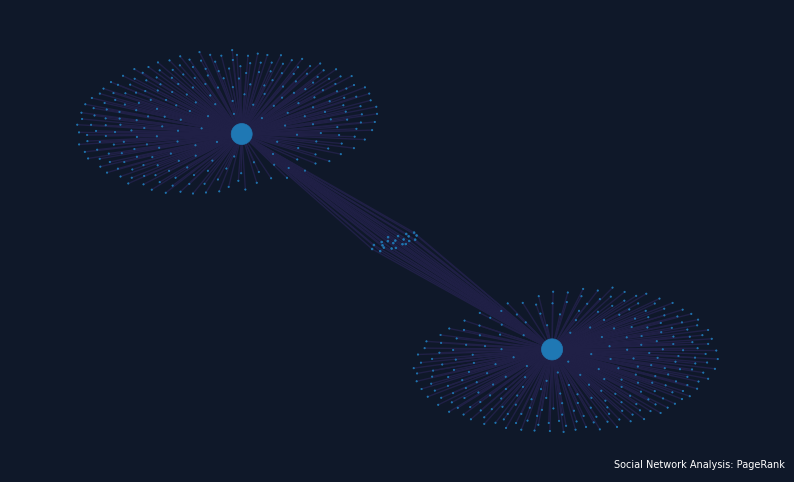

In [16]:

fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')

node_sizes = [pagerank[n] * 1000  for n in G.nodes()]
node_colors = [pagerank[n] * 1000  for n in G.nodes()]

# 2. Draw the graph
nx.draw(G, 
        with_labels=False, 
        node_size=node_sizes,
        cmap=plt.cm.Reds,    
        edge_color='#202046')

# 3. Configure plotter 
ax.set_title("Social Network Analysis: PageRank", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#0F1829')
ax.set_facecolor('#0F1829')

## Setp 10: Peripheral Node
Those nodes that are not very conected to the network, are those that are the extrems of the network and barely have a connection with it, for example one node.

There is not a specific function that calculates this in networkX.

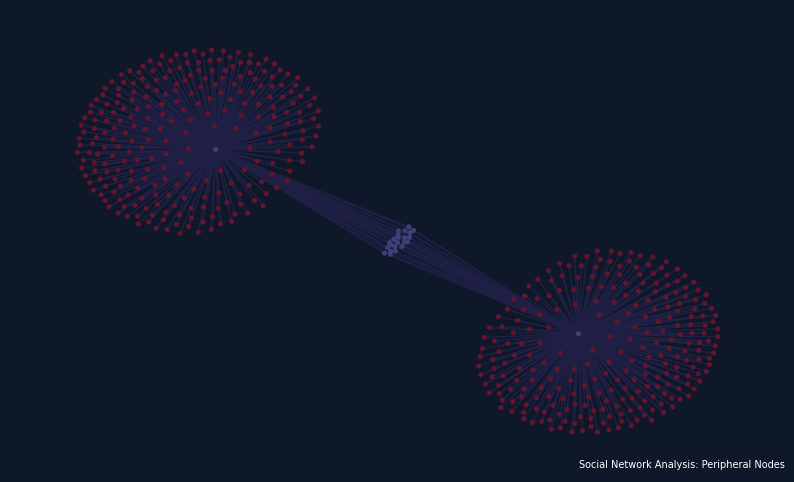

In [17]:
# 1. Initialize the plotter
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')

# 2. Calculate Peripheral Nodes

# Calculate the eccentricity of each node
ecc = nx.eccentricity(G)

# Find the maximum eccentricity in the graph
max_ecc = max(ecc.values())

# Find all nodes that have the maximum eccentricity
peripheral_nodes = [node for node, eccentricity in ecc.items() if eccentricity == max_ecc]


# 3. Draw the graph
node_colors = ['#64142d' if node in peripheral_nodes else '#404076' for node in G.nodes()]
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=10, edge_color='#202046', font_size=15, font_color='white')

# 4. Configure plotter 
ax.set_title("Social Network Analysis: Peripheral Nodes", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#0F1829')
ax.set_facecolor('#0F1829')

## Setp 10: Bridge Nodes
Bridge are those nodes that connect two or more groups together.

We can calculate the briges nodes using `networkX`, by symply calling `birdges()`

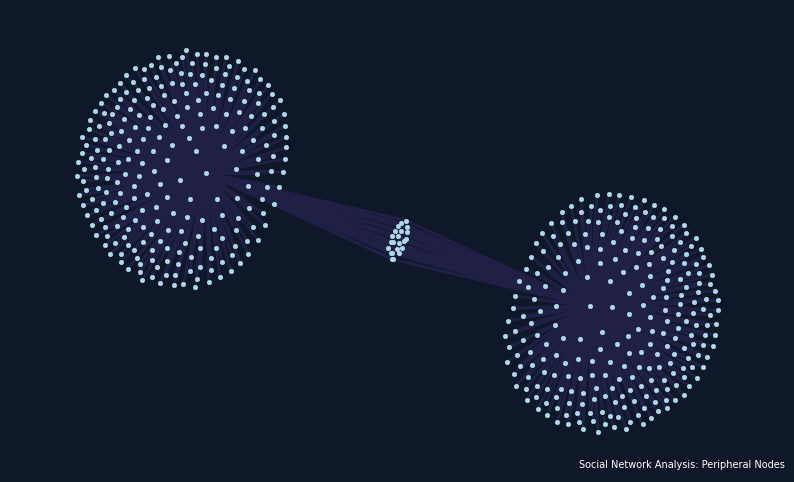

In [18]:
# 1. Initialize the plotter
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')

# 2. Calculate the bridges
articulation_points = list(nx.articulation_points(G))

# 3. Draw the graph
node_colors = ['#64142d' if node in articulation_points else '#404076' for articulation_points in G.nodes()]
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=10, edge_color='#202046', width=2)

# 4. Configure plotter 
ax.set_title("Social Network Analysis: Peripheral Nodes", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#0F1829')
ax.set_facecolor('#0F1829')

## Setp 10: Comunity Detection
Comunities subgrups of nodes inside a network, that have a crear separation between each other.

We can calculate the briges nodes using `networkX`, by using the comunity detector algorithm girvan_newman

KeyboardInterrupt: 

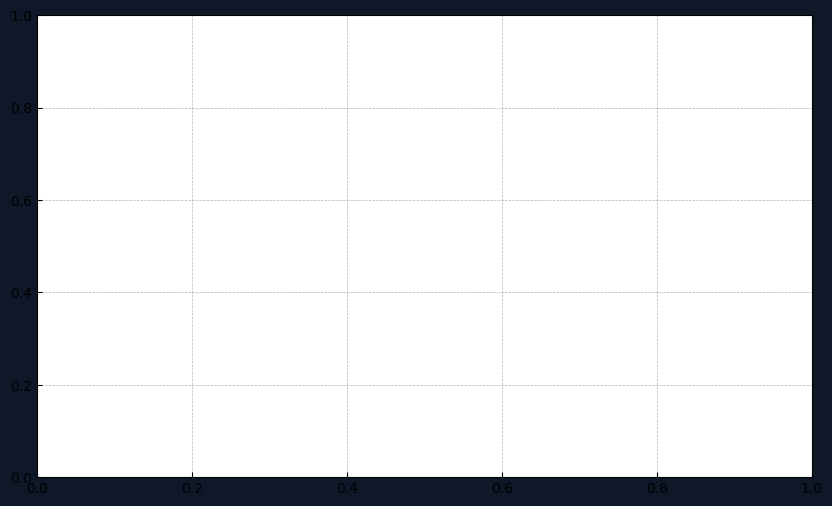

In [19]:
from networkx.algorithms.community import girvan_newman
from networkx.algorithms import bridges

# Create a sample graph (You can replace this with your actual graph)
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')

# 1. Detect communities using Girvan-Newman algorithm
communities = girvan_newman(G)

# Take the first level of communities (first split)
first_community_level = next(communities)
community_list = [list(c) for c in first_community_level]

color_map = []
for node in G:
    for i, community in enumerate(community_list):
        if node in community:
            color_map.append(i+100)


# 3. Draw the graph
nx.draw(G, pos, with_labels=False, node_color=color_map, node_size=20, edge_color='#202046', font_size=15, font_color='white')

# 4. Configure plotter 
ax.set_title("Social Network Analysis: Comunity Detection", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#3F4869')
ax.set_facecolor('#3F4869')

Boundary Nodes: {'https://www.youtube.com/watch?v=WDKEYlIeiVk', 'https://www.youtube.com/watch?v=yhpTinbzhpg', 'https://www.youtube.com/user/TheYoungTurks/videos', 'https://www.youtube.com/watch?v=n8bK3QMsFKs', 'https://www.youtube.com/watch?v=FthM86dsWYc', 'https://www.youtube.com/watch?v=cX7ubSkvGi4', 'https://www.youtube.com/watch?v=7kQJifNIa1U', 'https://www.youtube.com/watch?v=uHIE_HF39Ao', 'https://www.youtube.com/watch?v=Yn6AU-lLjSw', 'https://www.youtube.com/watch?v=8LqoLBQ68Uw', 'https://www.youtube.com/watch?v=Zg6NHtJEu3Y', 'https://www.youtube.com/watch?v=f0KMz_AUBFM', 'https://www.youtube.com/watch?v=aGuPhL8dzJw', 'https://www.youtube.com/watch?v=0VDbf9VsZ88', 'https://www.youtube.com/watch?v=zopTkefjBFI', 'https://www.youtube.com/watch?v=VEjDsAnupB8', 'https://www.youtube.com/watch?v=xukWkOv4a-w', 'https://www.youtube.com/watch?v=BV9knzayzqk', 'https://www.youtube.com/watch?v=9mpwlkc2a5s', 'https://www.youtube.com/watch?v=PC8GZLi7d7o', 'https://www.youtube.com/user/FoxNews

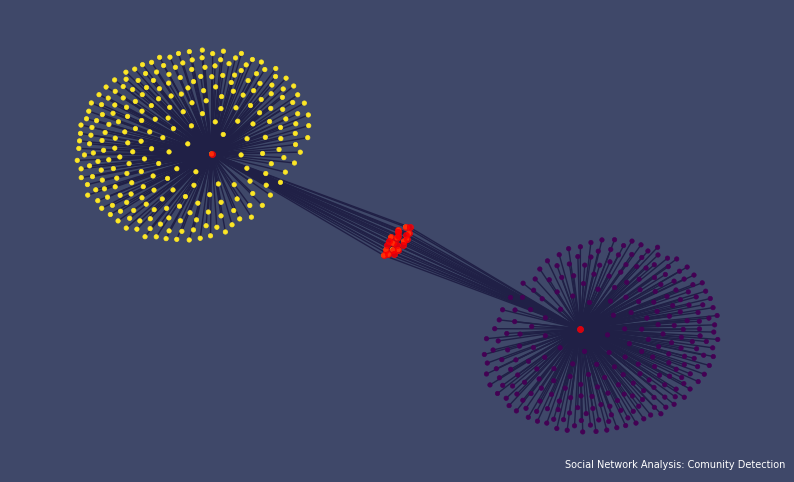

In [133]:

# Create a sample graph (You can replace this with your actual graph)
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0F1829')


# Create a dictionary to map nodes to their community
node_community_map = {}
for i, community in enumerate(community_list):
    for node in community:
        node_community_map[node] = i

# 2. Identify boundary nodes
boundary_nodes = set()

for node in G.nodes():
    neighbor_communities = set()  # To store communities of the neighbors
    for neighbor in G.neighbors(node):
        neighbor_communities.add(node_community_map[neighbor])
    
    # If the node's neighbors belong to more than one community, it's a boundary node
    if len(neighbor_communities) > 1:
        boundary_nodes.add(node)

# Print the detected boundary nodes
print("Boundary Nodes:", boundary_nodes)

# Assign different colors for different communities
color_map = []
for node in G:
    color_map.append(node_community_map[node])

# Draw the graph with node colors based on community
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=color_map, with_labels=False, node_size=10, edge_color='#202046')

# Highlight boundary nodes in the graph
nx.draw_networkx_nodes(G, pos, nodelist=boundary_nodes, node_color='r', node_size=20, alpha=0.8)

# 4. Configure plotter 
ax.set_title("Social Network Analysis: Comunity Detection", color='white', fontsize=7, fontweight='light', loc='right', y=-0.01)
ax.axis('off')
fig.patch.set_facecolor('#3F4869')
ax.set_facecolor('#3F4869')


In [113]:
import networkx as nx
import numpy as np
from collections import Counter


# 1. Compute the clustering coefficient for each node
clustering_coeff = nx.clustering(G)

# 2. Compute the betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# 3. Compute the bridging coefficient for each node
bridging_coeff = {}
for node in G.nodes():
    if clustering_coeff[node] != 0:
        bridging_coeff[node] = betweenness_centrality[node] / clustering_coeff[node]
    else:
        # Assign 0 bridging coefficient for nodes with clustering coefficient = 0
        bridging_coeff[node] = 0

# Normalize bridging coefficients
max_bridging_coeff = max(bridging_coeff.values())
for node in bridging_coeff:
    if max_bridging_coeff > 0:  # Avoid division by zero in normalization
        bridging_coeff[node] = (bridging_coeff[node] / max_bridging_coeff) * 100

# 4. Group similar values
rounded_bridging_coeff = {node: round(coeff, -1) for node, coeff in bridging_coeff.items()}

# 5. Count how many nodes for bridging coefficient
coeff_counts = Counter(rounded_bridging_coeff.values())

# 6. Calculate the percentage of nodes in each group
total_nodes = len(G.nodes())
coeff_percentages = {coeff: (count / total_nodes) * 100 for coeff, count in coeff_counts.items()}

# 7. Print the percentage distribution of nodes for each bridging coefficient group
print("Percentage of nodes with each bridging coefficient (grouped):")
for coeff, percentage in sorted(coeff_percentages.items()):
    print(f"Bridging Coefficient ~{coeff:.0f}: {percentage:.2f}% of nodes")


Percentage of nodes with each bridging coefficient (grouped):
Bridging Coefficient ~0: 20.00% of nodes
Bridging Coefficient ~10: 40.00% of nodes
Bridging Coefficient ~20: 20.00% of nodes
Bridging Coefficient ~40: 6.67% of nodes
Bridging Coefficient ~60: 6.67% of nodes
Bridging Coefficient ~100: 6.67% of nodes
